# **Tarea 4**

**Harold Vazquez Corrilo**

In [1]:
# Para que mi compu pueda llamar a las librerias
import sys 
sys.path.append('/home/haroldvaz/computacional/lib/python3.8/site-packages')

In [2]:
# Llamamos a las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

### 1. **El límite de difracción de un telescopio.**
Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede cinsiderarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a través de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción esta dada por: 
$$I(r) = \left( \dfrac{J_1(kr)}{kr} \right)^2,$$
donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k=2\pi/\lambda$ y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m(x)$ están dadas por:
$$J_m(x) = \dfrac{1}{\pi}\int_{0}^{\pi}\cos(m\theta-x\sin(\theta))d\theta,$$
donde $m$ es un entero no negativo y $x\geq 0$.

**(a)** Escribe una función `J(m,x)` que calcule el valor de $J_m(x)$ usando la regla de Simpson con $N=1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_0,\ J_1 \ \text{y}\ J_2$ como una función de $x$ (de $x=0$ a $x=20$).

In [3]:
# Definimos a la regla de Simpson como una funcion 
def simpI(f,x,m,a,b,n):
    dom = np.linspace(a,b,n)
    h = (b-a) / n
    S = (f(a,x,m)+f(b,x,m))
    for i in range(1,int(n/2)):
        S += 4*f(a + (2*i+1)*h,x,m)
    for i in range(0,int(n/2)+1):
        S += 2*f(a+(2*i)*h,x,m)
    return S*(h/3)

In [4]:
# Definimols la función que va dentro de la integral
def inte(t,x,m):
    return np.cos(m*t - x*np.sin(t))

In [5]:
# Definimos la funcion J(m,x)
def J(m,x):
    return (1/np.pi)*simpI(inte,x,m,0,np.pi,1000)

In [6]:
# Definimos el dominio y evaluamos en la funcion que programamos y en la que viene en la 
# libreria scipy
x1 = np.linspace(0,20,1000)
y0 = J(0,x1)
y1 = J(1,x1)
y2 = J(2,x1)

y00 = sp.jv(0,x1)
y11 = sp.jv(1,x1)
y22 = sp.jv(2,x1)

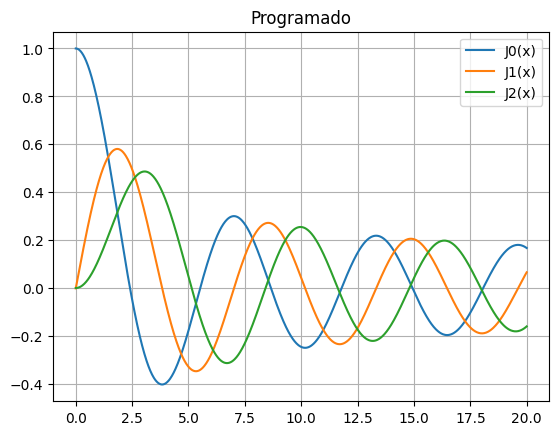

In [7]:
# Graficamos los que obtuvimos con nuestra propia funcion
plt.plot(x1,y0,label= 'J0(x)')
plt.plot(x1,y1,label= 'J1(x)')
plt.plot(x1,y2,label= 'J2(x)')
plt.legend()
plt.grid()
plt.title('Programado');

**(b)** Compara tus resultados con los proporcionados con la biblioteca `scipy` que implementa la regla de Simpson.

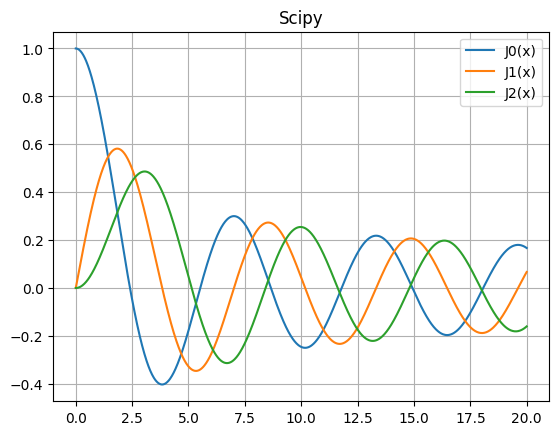

In [8]:
# Graficamos las funciones proporcionadas por scipy  
plt.plot(x1,y00,label= 'J0(x)')
plt.plot(x1,y11,label= 'J1(x)')
plt.plot(x1,y22,label= 'J2(x)')
plt.legend()
plt.grid()
plt.title('Scipy');

Al comparar ambas graficas notamos que son practicamente las mismas.

**(c)** Escribe un segundo programa que haga una gráfica de densidad (`density plot`) de la instensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda=500$ nm, en una región cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de $r$ desde cero hasta aproximadamente $1\ \mu$m.

In [9]:
# Definimos la funcion para la intensidad
def intensidad(r):
    if r == 0:
        return 1/4
    if r != 0:
        return (J(1,r)/r)**2

# Definimos las constantes necesarias y el dominio donde evaluaremos la funcion

k = 2*np.pi/(5e-7)
x = np.linspace(-1e-6,1e-6,300)
y = np.linspace(-1e-6,1e-6,300)
X,Y = np.meshgrid(x,y)

R = k*np.sqrt(X**2+Y**2)

# Cramos un arreglo de intensidades con todas las entradas iguales a cero
I = np.zeros((len(R),len(R)))

In [10]:
# Evaluamos la funcion y obtenemos el arreglo de intensidades

for i in range(len(R)):
    for j in range(len(R)):
        I[i,j] = intensidad(R[i,j])

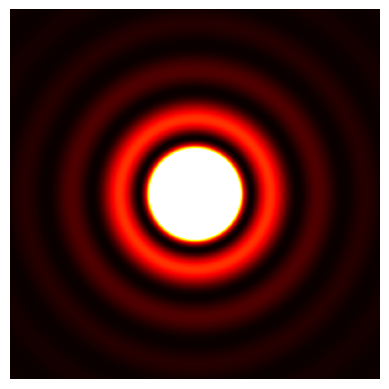

In [11]:
# Graficamos las intensidades
plt.imshow(I,cmap='hot',vmax=0.01)
plt.axis('off')
plt.show();

### 2. **Error de estimación.**


Escribe un programa, o modifica alguno que hicimos en clase, para calcular el valor de la integral $\int_{0}^{2}(x^4-2x+1)dx$, usando la regla trapezoidal con cortes de 20, pero esta vez haz que el programa también imprima una estimación del error en el resultado, calculado usando la ecuación: 
$$\epsilon = \dfrac{1}{3}(I_2-I_1),$$
donde $\epsilon$ es el error e $I_1$ e $I_2$ son estimaciones usando con $N_1$ y $N_2$ pasos respectivamente. Por lo que necesitarás evaluar la integral dos veces, una con $N_1=10$ "rebanadas" y luego otra vez con $N_2=20$ "rebanadas".

**(a)** ¿Cómo se compara el error calculado de esta manera con un cálculo directo del error como la diferencia entre su valor para la integral y el valor verdadero de 4.4?¿Por qué los dos no cuadran perfectamente? 

In [12]:
# definimos una funcion para integrar con la regla trapezoidal 
def trapI(f,a,b,n):
    dom = np.linspace(a,b,n)
    dx = (b-a) / n
    S = (f(a)+f(b))/2
    for i in range(1,n):
        S += f(a + i*dx)
    return S*dx

# definimos la funcion que queremos integrar 
def fun2(x):
    return x**4 - 2*x + 1

In [13]:
# integramos la funcion de 0 a 2
a = 0
b = 2

# usamos 20 cortes 
I2 = trapI(fun2,a,b,20)

# usamos 10 cortes 
I1 = trapI(fun2,a,b,10)

# calculamos el error
error = (1/3)*(I2-I1)

print('La integral es:',I2)
print('El error es:',error)

La integral es: 4.426660000000001
El error es: -0.026633333333333137


El error calculado en valor absoluto es mayor al error calculado directamente del valor real de la integral, esto se puede explicar a partir de que para obtener las expresiones del error se hacen aproximaciones despreciando términos que contribuyen muy poco, sin embargo, al ser una aproximación, no se llega a obtener el error exacto, también puede contribuir el error de calculo de cifras decimales de python. 

**(b)** Compara tus resultados con los proporcionados con la biblioteca de `scipy` que implementa la regla trapezoidal.

In [14]:
from scipy import integrate
xt = np.linspace(0,2,20, endpoint=True)
I3 = integrate.trapezoid(fun2(xt),xt)
xt2 = np.linspace(0,2,10, endpoint=True)
I4 = integrate.trapezoid(fun2(xt2),xt2)

error2 = (1/3)*(I3-I4)
print('La integral es:',I3)
print('El error es:',error2)

La integral es: 4.429539368175504
El error es: -0.03399509925996291


Notamos que nuestra integral da un resultado más cercano al verdadero y el error también esta más cerca del real.

### 3. **Capacidad calorífica de un sólido.**

La *teoría de sólidos de Debye* dice que la *capacidad calorífica* de un sólido a una temperatura $T$ esta dada por: 
$$C_V = 9V\rho\kappa_B \left( \dfrac{T}{\theta_D} \right)^3 \int_{0}^{\theta_D/T} \dfrac{x^4 e^x}{(e^x-1)^2}dx,$$
donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $\kappa_B$ es la constante de Boltzmann y $\theta_D$ es la llamada *temperatura de Debye*, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.

**(a)** Escribe una función `Cv(T)` que calcule la $C_V$ para un valor dado de temperatura, de una muestra que consta de 1000 centímetros cúbicos de aluminio sólido, con densidad jumérica de $\rho = 6.022\times 10^{28} \ \text{m}^{-3}$ y una temperatura de Debye de $\theta_D = 428$ K. Utiliza la **cuadratura gaussiana** para evaluar la integral, con $N=50$ *puntos muestra*.

In [15]:
# Llamamos a la funcion que nos daran los pesos
from scipy.special import roots_legendre

# Definimos las constantes 
C = 831.4268278 #J/K, es el producto de VpK_B
theta = 428 #K

# Definimos la funcion que integraremos

def fun3(x):
    return (x**4 * np.exp(x)) / (np.exp(x)-1)**2

# Definimos la funcion Cv
def Cv(T):
    N = 50
    a = 0
    b = theta / T
    roots, weights = roots_legendre(N)
    x = 0.5*(b-a) *roots + 0.5*(b+a)
    w = 0.5*(b-a)* weights
    integ = 0
    for i in range(N):
        integ +=  w[i]*fun3(x[i])
    return 9*C*integ*(T/theta)**3

**(b)** Usa tu función para hacer una gráfica de la capacidad calorífica en función de la temperatura desde $T=5$K hasta $T=500$K.

In [17]:
# Definimos el dominio de temperaturas y evaluamos la funcion 
Tem = np.linspace(5,500,1000)
Y = np.zeros(len(Tem))

for i in range(len(Tem)):
    Y[i] = Cv(Tem[i])


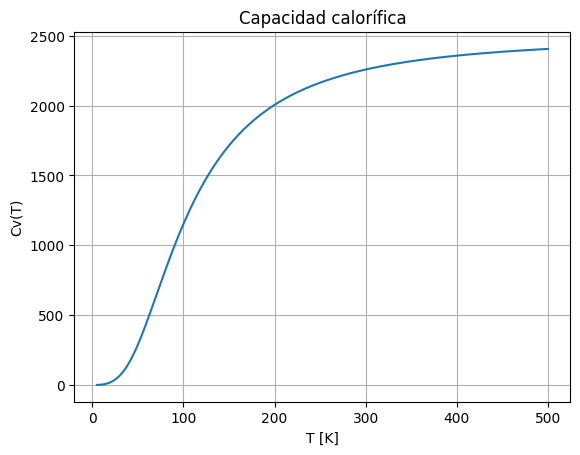

In [18]:
# Graficamos los puntos obtenidos al evaluar
plt.plot(Tem,Y)
plt.grid()
plt.xlabel("T [K]")
plt.ylabel("Cv(T)")
plt.title('Capacidad calorífica');

### 4. **Incertidumbre cuántica en el oscilador armónico.**

En unidades donde todas las constantes son 1, la función de onda del *n*ésimo nivel de energía del oscilador armónico cuántico unidimensional, (i.e., una partícula puntual sin espín en un pozo de potencial cuadrático) está dada por:
$$\psi_n(x) = \dfrac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-x^2/2}H_n(x),$$
para $n=0...\infty$, donde $H_n(x)$ es el *n*ésimo polinomio de Hermite. Los polinomios de Hermite satisfacen una relación algo similar a la de los números de Fibonacci, aunque más compleja:
$$H_{n+1}(x) = 2xH_n(x)-2nH_{n-1}(x)$$.
Los dos primeros polinomios de Hermite son $H_0(x)=1$ y $H_1(x)=2x$.

**(a)** Escribe una función `H(n,x)` que calcule $H_n(x)$ dados $x$ y cualquier número entero $n \geq 0$. Utiliza tu función para hacer una gráfica que muestre las funciones de onda del oscilador armónico para $n=0,1,2,3$, todos en el mismo gráfico, en el rango de $x=-4$ a $x=4$.

In [19]:
# Definimos la función que genera los polinomios de hermite 
def H(n,x):
	H = [1+0*x,2*x]
	if n>1:
	    for ni in range(2,n+1):
		    H.append(2*x*H[ni-1] - 2*(ni-1)*H[ni-2])
	
	return H[n]

In [27]:
# Llamamos a la libreria math
from math import *

# Ahora definimos la funcion de onda
def onda(n,x):
    return (1 / np.sqrt(2**n * factorial(n) * np.sqrt(pi)))* np.exp(-x**2 / 2) * H(n,x)

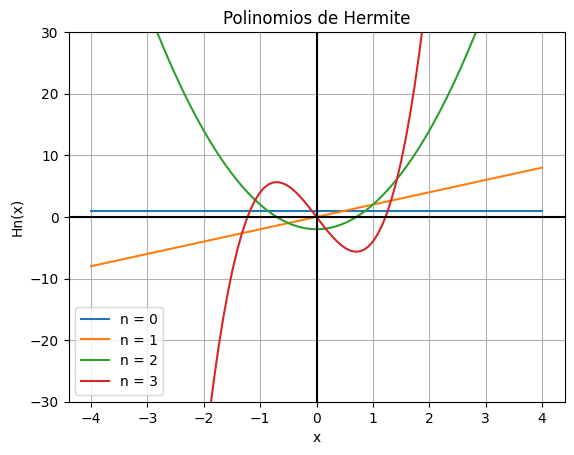

In [25]:
# Definimos el dominio en el cual graficaremos
x = np.linspace(-4,4,100)

# Graficamos los 4 polinomios 
for i in range(4):
    plt.plot(x,H(i,x),label='n = {0:.0f}'.format(i))

plt.grid()
plt.legend()
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.title('Polinomios de Hermite')
plt.xlabel('x')
plt.ylabel('Hn(x)')
plt.ylim(-30,30);

**(b)** Haz una gráfica aparte, de la *función de onda* para $n=30$ desde $x=-10$ hasta $x=10$. *Hint:* si tu programa tarda demasiado en ejecutarse en este caso, entonces está haciendo mal el cálculo; el programa debería tardar aproximadamente un segundo en ejecutarse.

0.05164217948913574 segundos


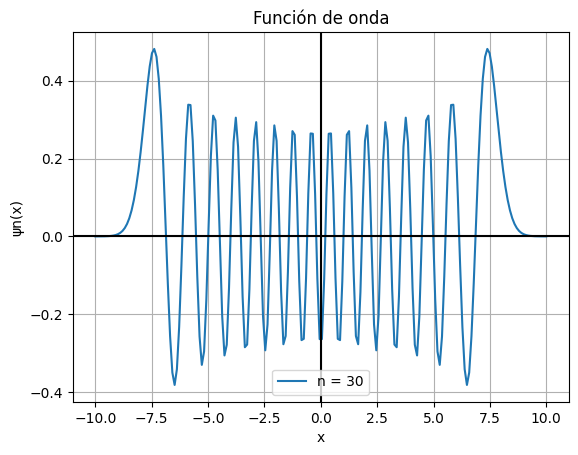

In [30]:
# Medimos el tiempo de jecucion 
import time
inicio = time.time()

# Definimos el dominio donde vamos a graficar
x2 = np.linspace(-10,10,200)

# Graficampos la funcion de onda
plt.plot(x2,onda(30,x2),label='n = 30')
plt.grid()
plt.legend()
plt.title('Función de onda')
plt.xlabel('x')
plt.ylabel('ψn(x)')
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black');

# Imprimimos el tiempo 
fin = time.time()
print(fin-inicio, 'segundos') 

**(c)** La incertidumbre cuántica de una partícula en el *n*ésimo nivel de un oscilador armónico cuántico se puede cuantificar mediante su *media cuadrática* $\sqrt{\langle x^2\rangle}$, donde:
$$ \langle x^2 \rangle = \int_{-\infty}^{\infty} x^2 |\psi_n(x)|^2dx.$$
Escribe un programa que evalúe esta integral usando la cuadratura gaussiana en 100 puntos y luego calcula la incertidumbre (es decir, la posición media cuadrática en la partícula) para un valor dado de $n$. Utiliza tu programa para calcular la incertidumbre para $n=5$. Deberías obtener una respuesta cercana a $\sqrt{\langle x^2\rangle} = 2.3$.

In [31]:
# Definimos el numero de puntos para la cuadratura y el intervalo donde integraremos [a,b]
N = 100
a = -25
b = 25

# Definimos la funcion que integraremos
def fun4(x):
    return x**2 * (onda(5,x))**2

# Obtenemos las raices y los pesos para la cuadratura
roots, weights = roots_legendre(N)
x = 0.5*(b-a) *roots + 0.5*(b+a)
w = 0.5*(b-a)* weights
integ = 0
for i in range(N):
    integ +=  w[i]*fun4(x[i])

# Imprimimos la incertidumbre
print('La incertidumbre es:',sqrt(integ))

La incertidumbre es: 2.3188345996359296


### 5. **Atracción gravitacional de una lámina uniforme.**
Una lámina de metal cuadrada uniforme flota inmóvil en el espacio:
<center><img src = "placa.png" style="width:300px;height:250px;"></center>
La lámina mide 10 m de lado, tiene un espesor insignificante y una masa de 10 toneladas.

**(a)** Considera la fuerza gravitacional debida a la placa que siente una masa puntual de 1 kg a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ es
$$F_z= Gz\sigma \int \int_{-L/2}^{L/2}\dfrac{dx dy}{(x^2+y^2+z^2)^{3/2}},$$
donde $G=6.674\times10^{-11} \text{m}^3\text{kg}^{-1}\text{s}^{-2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de área de la hoja.

Sabemos que para dos cuerpos puntuales, la fuerza gravitacional esta dada por:
$$\vec{F} = G \dfrac{mM}{|\vec{r}-\vec{r'}|^2}\frac{(\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|},$$
entonces, considerando que $\vec{r}=(0,0,z)$ y $\vec{r'}=(x',y',0)$, la fuerza gravitacional entre un cuerpo puntual y un diferencial de masa esta dado por:
$$d\vec{F} = G \dfrac{m dM}{|\vec{r}-\vec{r'}|^3}(\vec{r}-\vec{r'}),$$
usando que $\vec{r}-\vec{r'}=(-x',-y',z)$, $|\vec{r}-\vec{r'}|=(x'^2+y'^2+z^2)^{1/2}$ y $dM=\sigma dA=\sigma dx' dy'$, se tiene:
$$d\vec{F} = G \dfrac{m (\sigma dx' dy')}{(x'^2+y'^2+z^2)^{3/2}}(-x',-y',z),$$
por lo tanto para la componente z se tiene:
$$dF_z=Gmz\sigma\dfrac{dx' dy'}{(x'^2+y'^2+z^2)^{3/2}},$$
integrando y usando que $m=1\text{kg}$:
$$F_z= Gz\sigma \int \int_{-L/2}^{L/2}\dfrac{dx' dy'}{(x'^2+y'^2+z^2)^{3/2}},$$
haciendo el cambio de variable $x'=x$ y $y'=y$, se llega a que 
$$\therefore F_z= Gz\sigma \int \int_{-L/2}^{L/2}\dfrac{dx dy}{(x^2+y^2+z^2)^{3/2}}.$$

**(b)** Escribe un programa para calcular y graficar la fuerza en función de $z$ de $z=0$ hasta $z=10$ m. Para la integral doble utiliza la cuadraura Gaussiana (doble)
$$ I \simeq \sum_{i=1}^{N}\sum_{j=1}^{N} \omega_i \omega_j f(x_i,x_j),$$
con 100 puntos de muestra a lo largo de cada eje.

In [32]:
#Definimos las constantes 
G = 6.674e-11 # m^3 kg^-1 s^-2
sigma = 10000 / (10)**2  # kg / m^2
L = 10

#Definimos la funcion que integraremos 
def dA(x,y,z):
    return (G*sigma*z)/(x**2+y**2+z**2)**(3/2)
    
# Definimos una funcion F(z) que nos de la fuerza 
def F(z):
    N = 100
    a = -L/2
    b = L/2
    roots, weights = roots_legendre(N)
    x = 0.5*(b-a) *roots + 0.5*(b+a)
    w = 0.5*(b-a)* weights
    integ = 0
    for i in range(N):
        for j in range(N):
            integ +=  w[j]*w[i]*dA(x[i],x[j],z)
    return integ

# Definimos del dominio donde evaluaremos y evaluamos la funcion para obtener la fuerza
z = np.linspace(0,10,200)
Fue = F(z)

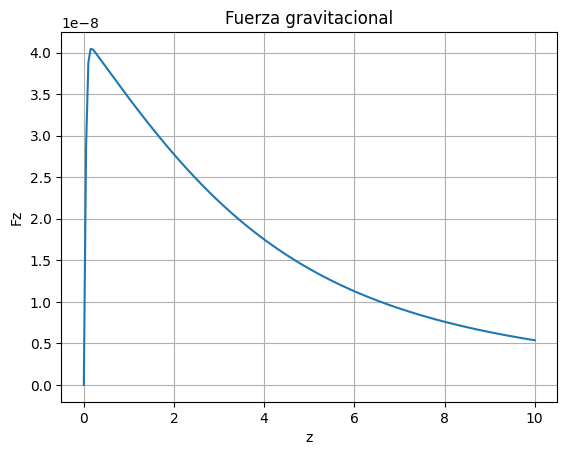

In [34]:
# Graficamos la fuerza como funcion de z
plt.plot(z,Fue)
plt.grid()
plt.xlabel('z')
plt.ylabel('Fz')
plt.title('Fuerza gravitacional');

**(c)** Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerza debería caer repentinamente a cero. Esta caida no es un efecto real, sino un artefacto de la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y dugiere una estrategia para eliminarlo, o al menos disminuir su tamaño.

Sabemos que para valores muy pequeños de $z$, $F_z$ tiende a infinito, es decir que cerca de $z=0$ la pendiente de la gráfica será cada vez más grande, pero al momento de obtener los pesos y las raices para la cuadratura, solo tenemos un número finito de puntos en todo el intervalo donde estamos integrando, por lo que cerca del cero también habrá finitos puntos, de esta manera termina habiendo una caida debido a la falta de puntos cerca del cero, una alternativa sería aumentar la cantidad de pesos y raices, ya que esto nos podrían ayudar a apreciar mejor la gráfica y que la caida se produzca aún más cerca del cero.

### 6. **Diferenciación numérica.**
Crea una función por el usuario `f(x)` que devuelva el valor de $1+\frac{1}{2}\tanh 2x$, luego usa una **diferencia central** para calcular la derivada de la función en el rango $-1\leq x\leq 2$. Calcula la derivada analíticamente y haz una gráfica con el resultado numérico y la respuesta analitica en el mismo gráfico. Puede resultar útil graficaer la respuesta exacta como líneas y la numérica como puntos.

In [37]:
# Definimos la funcion que vamos a derivar
def f(x):
    return 1 + (1/2)*np.tanh(2*x)

# Definimos la funcion de diferencia central
def derC(x,h):
    return (f(x + h/2)-f(x - h/2)) / h

# Definimos la derivada anatilica
def der(x):
    return (1/ np.cosh(2*x))**2

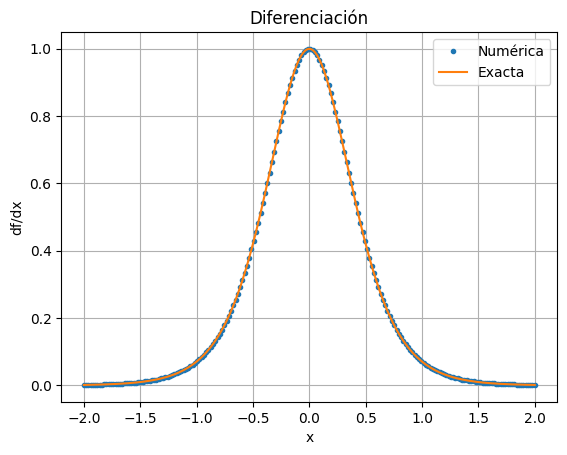

In [38]:
# Definimos el dominio donde graficaremos
x0 = np.linspace(-2,2,200)

# graficamos las dos derivadas
plt.plot(x0,derC(x0,0.001),'.',label='Numérica')
plt.plot(x0,der(x0),'-',label='Exacta')
plt.title('Diferenciación')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.grid()
plt.legend();

### 7. **Procesamiento de imágenes y STM.**
Cuando la luz incide sobre una superficie, la cantidad que cae por unidad de área depende no sólo de la intensidad de la luz, sino también del ángulo de incidencia. Si la luz forma un ángulo $\theta$ con la normal, sólo "ve" una fracción $\cos\theta$ de área, por unidad de área real en la superficie:
<center><img src = "luz.png" style="width:400px;height:200px;"></center>

Así, la intensidad de la iluminación es $ a\cos\theta$, si $a$ es la intensidad bruta de la luz. Esta simple ley física es un elemento central de los gráficos por computadora en 3D. Nos permite calcular cómo incide la luz sobre objetos tridimensionalesy, por tanto, cómo se verán cuando se iluminen desde varios ángulos.

Supongamos, por ejemplo, que miramos la Tierra desde arriba y vemos sus montañas. Conocemos la altura de las montañas $w(x,y)$ en función de la posición en el plano, por lo que la ecuación para la superficie de la Tierra es simplemente $z=w(x,y)$, o equivalentemente $w(x,y)-z=0$, y el vector normal $\vec{v}$ a la superficie está dado por el gradiente de $w(x,y)-z$ de la siguiente manera:
$$\vec{v} = \nabla[w(x,y)-z] = \begin{pmatrix} \partial/\partial x \\ \partial/\partial y\\ \partial/\partial z\end{pmatrix} [w(x,y)-z] = \begin{pmatrix} \partial w/\partial x \\ \partial w/\partial y\\ -1\end{pmatrix}.$$
Ahora supongamos que tenemos luz entrante presentada por un vector $\vec{a}$ con magnitud igual a la intensidad de la luz. Entonces el producto escalar de los vectores $\vec{a} \ \text{y} \ \vec{v}$ es:
$$ \vec{a} \cdot \vec{v} = |\vec{a}||\vec{v}|\cos\theta,$$
donde $\theta$ es el ángulo entre los vectores.
Entonces, la intensidad de la iluminación de la superficie de las montañas es: 
$$ I = |\vec{a}|\cos\theta = \dfrac{\vec{a} \cdot \vec{v}}{|\vec{v}|} = \dfrac{a_x(\partial w/\partial x)+a_y(\partial w/\partial y)-a_z}{\sqrt{(\partial w/\partial x)^2+(\partial w/\partial y)^2 +1}}.$$
Tomemos un caso simple donde la luz brilla horizontalmente con intensidad unitaria, a lo largo de una línea en un ángulo $\phi$ en sentido contrario a las manecillas del reloj desde el eje este-oeste, de como que $\vec{a}=(\cos\phi,\sin\phi,0)$. Entonces nuestra intensidad de iluminación se simplifica a:
$$ I = \dfrac{\cos\phi(\partial w/\partial x)+\sin\phi(\partial w/\partial y)}{\sqrt{(\partial w/\partial x)^2+(\partial w/\partial y)^2 +1}}.$$
Así, si podemos calcular las derivadas de la altura $w(x,y)$ y sabemos $\phi$, entonces podemos calcular la intensidad en cualquier punto.

**(a)** El archivo adjunto `altitudes.txt`, contiene la altitud $w(x,y)$ en metros sobre el nivel del mar (o profundidad bajo el nivel del mar) de la superficie de la Tierra, medida en una cuadrícula de puntos $(x,y)$. Escribe un programa que lea este archivo y almacene los datos en una matriz. Luego calcula las derivadas $\partial w/\partial x$ y $\partial w/ \partial y$ en cada punto de la cuadrícula. Explica qué método utilizaste para calcularlos y por qué.

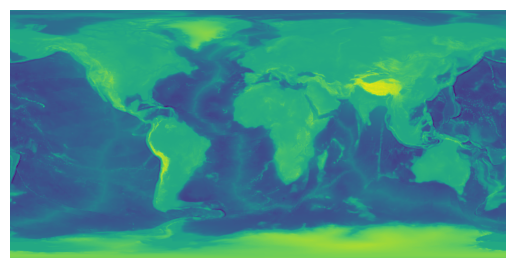

In [39]:
# Cargamos el archivo y guardamos los datos en una matriz
w = np.loadtxt('altitudes.txt')

# Graficamos los datos originales
plt.imshow(w)
plt.axis('off');

In [40]:
# Definimos una funcion a partir de los datos 
def F(x,y):
    return w[x][y]

# Definimos las derivadas 
def dFdx_ade(f,x,y,h):
    return (f(x+h,y)-f(x,y)) / h

def dFdy_ade(f,x,y,h):
    return (f(x,y+h)-f(x,y)) / h

def dFdx_atr(f,x,y,h):
    return (f(x,y)-f(x-h,y)) / h

def dFdy_atr(f,x,y,h):
    return (f(x,y)-f(x,y-h)) / h

def dFdx_cen(f,x,y,h):
    return (f(x+h,y)-f(x-h,y)) / (2*h)

def dFdy_cen(f,x,y,h):
    return (f(x,y+h)-f(x,y-h)) / (2*h)

In [41]:
# Definimos los arreglos de las derivadas, con entradas iguales a cero
dwdx = np.zeros(np.shape(w))
dwdy = np.zeros(np.shape(w))

In [42]:
# Llenamos las cuadriculas de derivadas

for i in range(len(w)):
    for j in range(len(w[0])):
        if i == len(w)-1:
            dwdx[i][j] = dFdx_atr(F,i,j,1)
        if i == 0:
            dwdx[i][j] = dFdx_ade(F,i,j,1)
        if i>0 and i<len(w)-1:
            dwdx[i][j] = dFdx_cen(F,i,j,1)

dwdx

array([[ 146.73 ,  155.58 ,  164.15 , ...,  115.61 ,  126.62 ,  137.42 ],
       [ 731.605,  733.415,  732.505, ...,  701.315,  714.345,  725.44 ],
       [1042.81 , 1026.605, 1006.65 , ..., 1037.585, 1043.575, 1048.16 ],
       ...,
       [ -84.205,  -84.025,  -83.86 , ...,  -84.445,  -84.37 ,  -84.31 ],
       [ -97.925,  -97.17 ,  -96.365, ..., -100.205,  -99.485,  -98.69 ],
       [-111.81 , -110.97 , -110.16 , ..., -114.6  , -113.65 , -112.75 ]])

In [43]:
for i in range(len(w)):
    for j in range(len(w[0])):
        if j == len(w[0])-1:
            dwdy[i][j] = dFdy_atr(F,i,j,1)
        if j==0:
            dwdy[i][j] = dFdy_ade(F,i,j,1)
        if j>0  and j<len(w[0])-1:
            dwdy[i][j] = dFdy_cen(F,i,j,1)
dwdy

array([[ 1.28 ,  1.095,  0.875, ...,  2.71 ,  2.43 ,  2.27 ],
       [10.13 ,  9.805,  9.13 , ..., 13.83 , 13.335, 13.07 ],
       [ 4.9  ,  1.995, -2.255, ..., 28.995, 26.555, 24.46 ],
       ...,
       [-1.6  , -1.645, -1.665, ..., -1.5  , -1.605, -1.72 ],
       [-0.93 , -0.91 , -0.975, ..., -0.985, -1.015, -1.03 ],
       [-0.09 , -0.085, -0.065, ..., -0.05 , -0.09 , -0.13 ]])

Para los extremos de la cuadrícula utilicé la derivada hacia atrás y la derivada hacia adelante, dependiendo el punto de la cuadricula donde me encontrara y la que más me conviniera utilizar, dentro de la cuadrícula utilicé la derivada central, debido a que me pareció una mejor aproximación y porque los datos me lo permitían.

**(b)** Ahora, usando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula, con $\phi=45^{\circ}$, y haz un gráfico de densidad de los valores resultantes en el que el brillo de cada punto depende del correspondiente valor de intensidad. Si lo haces correctamente, la gráfica debería verse como un mapa en relieve del mundo; deberías poder ver los continentes y las cadenas montañosas en 3D.

In [44]:
# Calculamos la intensidad para phi=45 grados
I = (np.sqrt(2)/2)*(dwdx + dwdy) / np.sqrt(dwdx**2 + dwdy**2 + 1)
I 

array([[ 0.71323153,  0.71205118,  0.71085272, ...,  0.7234562 ,
         0.72052193,  0.7186702 ],
       [ 0.71682819,  0.71649538,  0.71586395, ...,  0.7209101 ,
         0.72018049,  0.71972899],
       [ 0.7104212 ,  0.70847923,  0.70552067, ...,  0.72658269,
         0.72486498,  0.72341064],
       ...,
       [-0.72036187, -0.72076102, -0.72095271, ..., -0.71950321,
        -0.7203774 , -0.72133158],
       [-0.71375282, -0.71365977, -0.71418613, ..., -0.71398749,
        -0.71424782, -0.71441108],
       [-0.70764743, -0.70761947, -0.70749474, ..., -0.70738829,
        -0.70763913, -0.70789376]])

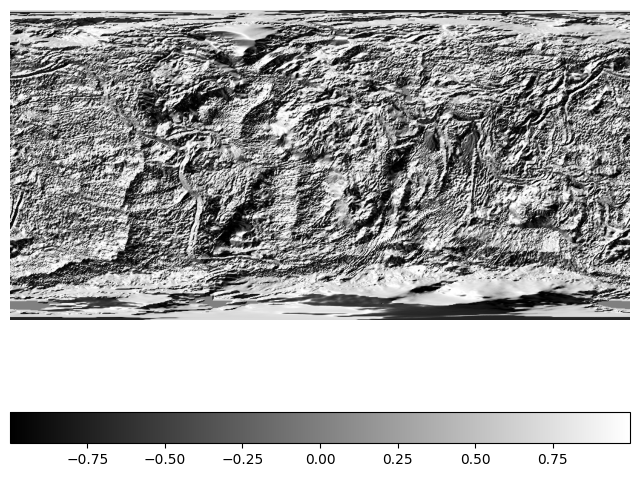

In [45]:
# Graficamos la intensidad de la luz
plt.figure(figsize=(8,8))
c = plt.imshow(I,cmap='gray')
plt.colorbar(c, orientation="horizontal")
plt.axis('off');

**(c)** El otro archivo adjunto llamado `stm.txt`, contiene una cuadrícula con valores de mediciones de un microscopio de efecto túnel (*scanning tunneling microscope* o **STM**) de la superficie (111) del silicio. Un microscopio de efecto túnel (STM) es un dispositivo que mide la forma de superficies a nivel átomico siguiendo una punta afilada sobre la superficie y midiendo la *corriente de efecto túnel cuántico* en función de la posición. El resultado final es una cuadrícula de valores que representan la altura de la superficie en función de la posición y los datos del archivo `stm.txt` contienen precisamente esa rejilla de valores. Modifica tu programa anterior para visualizar los datos STM y así crear una imagen 3D de cómo se ve la superficie de silicio.

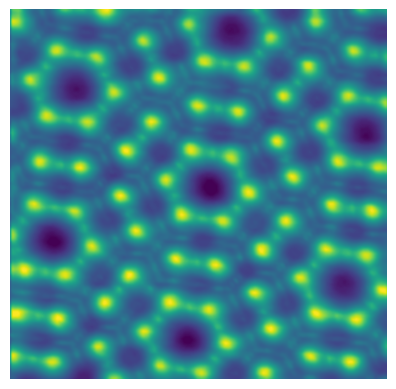

In [46]:
# Cargamos los datos y los guardamos en una matriz
w2 = np.loadtxt('stm.txt')

# Graficamos los datos originales
plt.imshow(w2)
plt.axis('off');

In [47]:
# Definimos una funcion a partir de los datos
def F2(x,y):
    return w2[x][y]

In [48]:
# Definimos los arreglos de las derivadas, con ceros en las entradas
dw2dx = np.zeros(np.shape(w2))
dw2dy = np.zeros(np.shape(w2))

In [49]:
# Llenamos las cuadriculas
h=2
for i in range(len(w2)):
    for j in range(len(w2[0])):
        if i >= len(w2)-h:
            dw2dx[i][j] = dFdx_atr(F2,i,j,h)
        if i == h-1:
            dw2dx[i][j] = dFdx_ade(F2,i,j,h)
        if i>h-1 and i<len(w2)-h:
            dw2dx[i][j] = dFdx_cen(F2,i,j,h)

dw2dx

array([[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-0.71  , -0.625 , -0.445 , ..., -0.445 , -0.355 , -0.355 ],
       [-0.62  , -0.5325, -0.4425, ..., -0.4   , -0.4   , -0.4   ],
       ...,
       [-0.0425, -0.045 , -0.09  , ...,  0.665 ,  0.665 ,  0.62  ],
       [-0.085 ,  0.    ,  0.    , ...,  0.62  ,  0.71  ,  0.62  ],
       [ 0.    ,  0.    , -0.09  , ...,  0.53  ,  0.62  ,  0.53  ]])

In [50]:
h=2
for i in range(len(w2)):
    for j in range(len(w2[0])):
        if j >= len(w2[0])-h:
            dw2dy[i][j] = dFdy_atr(F2,i,j,h)
        if j == h-1:
            dw2dy[i][j] = dFdy_ade(F2,i,j,h)
        if j>h-1 and j<len(w2[0])-h:
            dw2dy[i][j] = dFdy_cen(F2,i,j,h)
dw2dy

array([[ 0.    ,  2.215 ,  1.995 , ...,  0.1325,  0.18  ,  0.    ],
       [ 0.    ,  2.215 ,  1.9925, ...,  0.1325,  0.175 , -0.09  ],
       [ 0.    ,  2.215 ,  2.0375, ...,  0.1325,  0.265 , -0.09  ],
       ...,
       [ 0.    ,  0.44  ,  0.3525, ...,  0.135 ,  0.18  ,  0.    ],
       [ 0.    ,  0.355 ,  0.31  , ...,  0.1325,  0.18  ,  0.    ],
       [ 0.    ,  0.355 ,  0.31  , ...,  0.1325,  0.265 ,  0.    ]])

In [51]:
# Calculamos la intensidad de la luz, de nuevo para phi = 45 grados
I2 = (np.sqrt(2)/2)*(dw2dx + dw2dy) / (dw2dy**2 + dw2dy**2 + 1)**(1/2)
I2

array([[ 0.        ,  0.47631765,  0.47127314, ...,  0.09208886,
         0.12334555,  0.        ],
       [-0.50204581,  0.34191651,  0.36596889, ..., -0.21719071,
        -0.12355168, -0.31214431],
       [-0.4384062 ,  0.36180788,  0.36977586, ..., -0.18591525,
        -0.08938829, -0.34370946],
       ...,
       [-0.03005204,  0.23714423,  0.16611845, ...,  0.55564935,
         0.57903883,  0.4384062 ],
       [-0.06010408,  0.22433783,  0.20075767, ...,  0.52299523,
         0.60987522,  0.4384062 ],
       [ 0.        ,  0.22433783,  0.14247318, ...,  0.46044431,
         0.58598992,  0.37476659]])

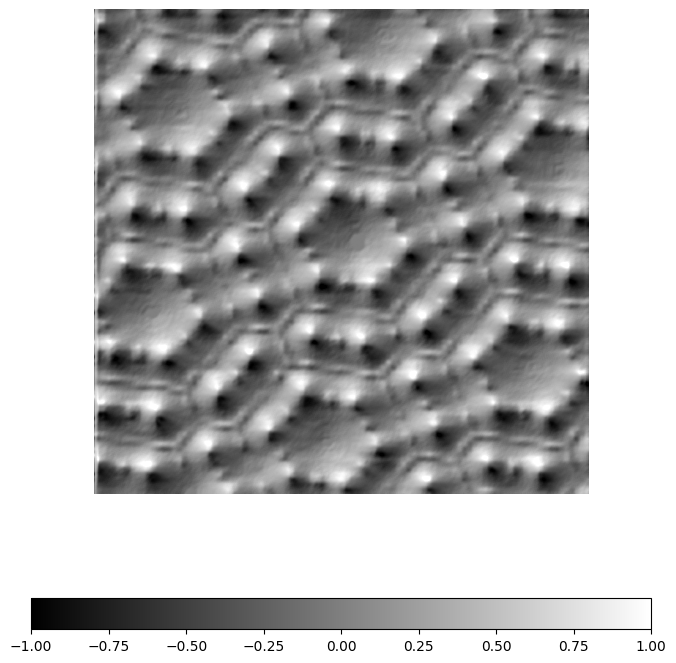

In [52]:
# Graficamos la intensidad de la luz
plt.figure(figsize=(8,9))
c2= plt.imshow(I2,cmap='gray',vmin=-1,vmax=1)
plt.colorbar(c2,orientation='horizontal')
plt.axis('off');